### $$\bf{\text{Homework 2}}$$
$\newline$
$$\bf{\text{Part 1: Linear Regression}}$$
$\newline$
$\newline$
$\newline$
$\newline$
$\newline$

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = os.getcwd() + '/'
file_name_str = 'dataset1.csv'
data_df = pd.read_csv(path + file_name_str)
print('\n\n     Data')
data_df.head()



     Data


,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
x_series = data_df['x']
y_series = data_df['y']
print(f'Shape of the x: {x_series.shape}')
print(f'Shape of the y: {y_series.shape}')

Shape of the x: (97,)
Shape of the y: (97,)


- [ ] $\bf{\text{A. }}$ $\bf{\text{Linear Regression with one variable:}}$
$\newline$
$\text{Consider the attached file dataset1.txt. The first column of the data file shows the input
data (x), and the second column}$
$\newline$
$\text{shows each samples’ output value (y).}$

- - $\text{1. What is the cost function J(θ) equation for linear regression?}$
- - - $\text{Answer:}$
$\newline$
$\newline$
$${\bf{LSE}} \; \text{Approach} \; \; \begin{cases}
J(\theta) = \; (\frac{1}{2}) \; \displaystyle{\sum_{i = 1}^{m} ({\bf{X}}^{(i)}{\bf{\theta}} - {\bf{y}}^{(i)})^{2}} 
\\
\\
\\
\\
J(\theta) = \; (\frac{1}{2}) \; \; ({\bf{X}} {\bf{\theta}} - {\bf{y}})^{T} ({\bf{X}} {\bf{\theta}} - {\bf{y}})
\\
\\
\\
\\
J(\theta) = \; (\frac{1}{2}) \; \;  \lVert {\bf{X\theta}} - {\bf{y}} \rVert_{2}^{2}
\end{cases}$$

- - $\text{2. Fit a linear regression model on your data using:}$

- - - $\text{a. Closed-form solution calculated by} \; {\bf{MSE}} \; \text{Method}$
$\newline$
$\newline$
- - - - $\text{Answer:}$
$\newline$
$\newline$
$${\bf{\theta^{*}}} = ({\bf{X}}^{T}{\bf{X}})^{-1} {\bf{X}}^{T}{\bf{y}}$$
$\newline$
$\newline$
$\text{By implementing in Python: }$
$\newline$
$\newline$
$${\bf{{\theta}^{*}}}{\,}{=}{\;\;} {\begin{pmatrix}-3.89578088 \\  1.19303364\end{pmatrix}}$$
$\newline$
$\newline$

In [4]:
x_ndarray = np.array(x_series)
y_ndarray = np.array(y_series)
x_vect_ndarray = np.reshape(x_ndarray, newshape=(x_ndarray.shape[0], -1))
y_vect_ndarray = np.reshape(y_ndarray, newshape=(y_ndarray.shape[0], -1))

x_mat_ndarray = np.concatenate((np.ones(shape=(x_vect_ndarray.shape[0], 1)), x_vect_ndarray), axis=1)
m = len(x_mat_ndarray)
print(f'Shape of X: {x_mat_ndarray.shape}\n')

theta_opt = np.linalg.inv(x_mat_ndarray.T @ x_mat_ndarray) @ x_mat_ndarray.T @ y_vect_ndarray
print(f'\u03B8 = \n{theta_opt}\n')

Shape of X: (97, 2)

θ = 
[[-3.89578088]
 [ 1.19303364]]



In [5]:
x_mat_ndarray[: 5]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

- - - $\text{b. Gradient Descent method in online (stochastic) mode (1500 iterations)}$
$\newline$
$\text{Answer:}$
$\newline$


In [6]:
def SGD(x: np.ndarray, y: np.ndarray, iteration: int=1500, learning_rate: float=0.01) -> (np.ndarray, np.ndarray):
    
    m, n = x.shape
    y = np.reshape(y, newshape=(m, 1))
    theta_init = np.zeros(shape=(n, 1))
    theta = theta_init
    J_theta = np.zeros(shape=(iteration*m, 1))
    count = 0
    for it in range(iteration):
        
        d_theta = np.zeros(shape=(n, 1))
        for i in range(m):
            
            for j in range(n):
                d_theta[j][0] = (1/m)*(x[i] @ theta - y[i]) * x[i][j]
            
#             d_theta /= (1/m)
            theta_new = theta - (learning_rate*d_theta)
            theta = theta_new
            J_theta[count][0] = (1/(2*m)) * ((x @ theta - y).T @ (x @ theta - y))
            count += 1
        
    return (theta, J_theta)

In [7]:
theta_opt1, J_theta1 = SGD(x_mat_ndarray, y_vect_ndarray)

In [8]:
print(f'Result of the Learning by using SGD algorithm: \n\n \u03B8 = \n{theta_opt1}')

Result of the Learning by using SGD algorithm: 

 θ = 
[[-3.58838901]
 [ 1.12366721]]


- - - $\text{c. Gradient descent method in batch mode (1500 iterations)}$
$\newline$
$\text{Answer:}$
$\newline$
$\text{We have}$
$\newline$
$$\frac{\partial{J(\theta)}}{\partial{\theta_{j}}} = (\frac{1}{m}) \sum_{i=1}^{m}({\bf{X^{(i)}}}{{\bf{\theta - y^{(i)}}}}){\;}{\bf{X}}^{(i)}_{j}$$

In [9]:
def BGD(x: np.ndarray, y: np.ndarray, iteration: int=1500, learning_rate: float=0.01) -> (np.ndarray, np.ndarray):
    
    m, n = x.shape
    y = np.reshape(y, newshape=(m, 1))
    theta_init = np.zeros(shape=(n, 1))
    theta = theta_init
    J_theta = np.zeros(shape=(iteration, 1))
    for it in range(iteration):
        
        
        d_theta = np.zeros(shape=(n, 1))
        for j in range(n):
            
            for i in range(m):
                d_theta[j][0] += ((x[i] @ theta) - y[i][0]) * x[i][j]
            d_theta[j][0] /= m
            
        theta_new = theta - (learning_rate*d_theta)
        theta = theta_new
        J_theta[it][0] = (1/(2*m)) * ((x @ theta - y).T @ (x @ theta - y)) 
            
    return (theta, J_theta)

In [10]:
theta_opt2, J_theta2 = BGD(x_mat_ndarray, y_vect_ndarray)

In [11]:
print(f'Result of the Learning by using BGD algorithm: \n\n \u03B8 = \n{theta_opt2}\n')

Result of the Learning by using BGD algorithm: 

 θ = 
[[-3.63029144]
 [ 1.16636235]]



In [12]:
x = x_mat_ndarray
y = y_vect_ndarray
m = x.shape[0]
theta = theta_opt
J_train_closed_form = (1/(2*m))*((x @ theta - y).T @ (x @ theta - y))
print(f'Result of the Cost Function for Closed-form method: \n\nJ(\u03B8) = {J_train_closed_form}\n')

Result of the Cost Function for Closed-form method: 

J(θ) = [[4.47697138]]



- - $\text{3. Plot the dataset and superimpose the fitted models using the three above methods.}$

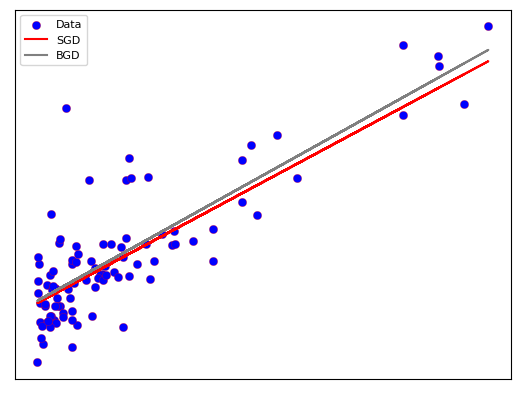

In [13]:
x = x_vect_ndarray
y = y_vect_ndarray
SGD_model = theta_opt1[0][0] + theta_opt1[1][0] * x
BGD_model = theta_opt2[0][0] + theta_opt2[1][0] * x
plt.figure()
plt.scatter(x, y, linewidths=0.2, c='blue', edgecolors='red', label='Data')
plt.plot(x, SGD_model, label='SGD', c='red')
plt.plot(x, BGD_model, label='BGD', c='Gray')
plt.xticks([]), plt.yticks([]), plt.legend(fontsize=8)
plt.show()

- - $\text{4. Use each estimated parameter θ (for each method) to predict the output for x = 6.2, 12.8,
22.1, 30.}$

In [14]:
x_for_pred = np.array([[6.2], [12.8], [22.1], [30]])
y_pred_closed_form = theta_opt[0][0] + theta_opt[1][0] * x_for_pred
y_pred_SGD = theta_opt1[0][0] + theta_opt1[1][0] * x_for_pred
y_pred_BGD = theta_opt2[0][0] + theta_opt2[1][0] * x_for_pred

In [15]:
predictions_df = pd.DataFrame({'Closed-form': y_pred_closed_form.ravel(), \
                               'SGD': y_pred_SGD.ravel(), 'BGD': y_pred_BGD.ravel()})

print('\n\n Results of the Predictions')
predictions_df



 Results of the Predictions


,Closed-form,SGD,BGD
0,3.501028,3.378348,3.601155
1,11.375050,10.794551,11.299147
2,22.470263,21.244656,22.146317
3,31.895228,30.121627,31.360579


- - $\text{5. Compare the parameter θ estimated by each method by plotting them in one figure.}$

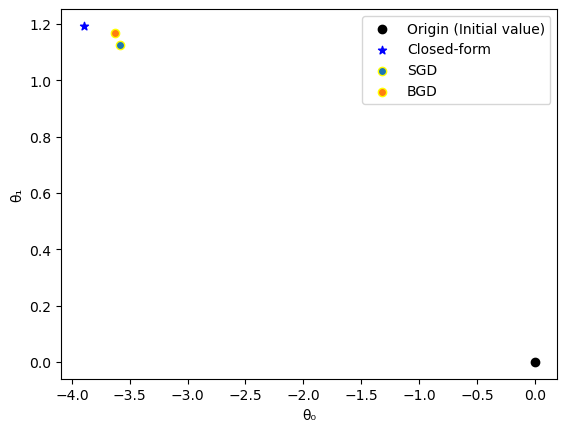

In [16]:
edge_color = 'yellow'
plt.figure()

plt.scatter([0], [0], c='black', label='Origin (Initial value)')
plt.scatter(theta_opt[0], theta_opt[1], label='Closed-form', c='blue', marker='*')
plt.scatter(theta_opt1[0], theta_opt1[1], edgecolor=edge_color, label='SGD')
plt.scatter(theta_opt2[0], theta_opt2[1], edgecolor=edge_color, label='BGD')
plt.xlabel('\u03B8\u2080'), plt.ylabel('\u03B8\u2081')
plt.legend()
plt.show()

- - $\text{6. Plot the cost function (θ) along the epochs (plot both online & batch methods on one
figure using hold on command).}$

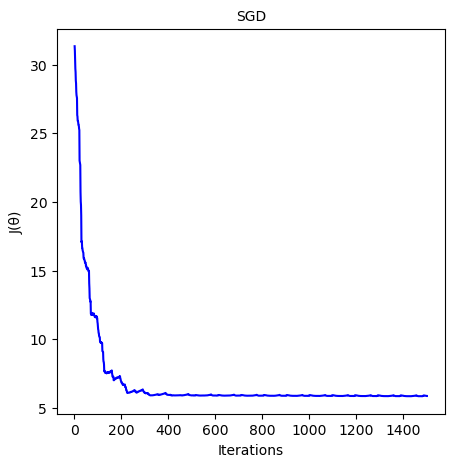


Final value of the Cost Function for SGD method:

J(θ) = [4.54607324]



In [17]:
iterations1 = np.arange(1, len(J_theta1) + 1)
plt.figure(figsize=(5, 5))
plt.plot(iterations1[: 1500], J_theta1[: 1500], c='blue'), plt.title('SGD', fontsize=10), \
plt.xlabel('Iterations'), plt.ylabel('J(\u03B8)')
plt.show()
print(f'\nFinal value of the Cost Function for SGD method:\n\nJ(\u03B8) = {J_theta1[-1]}\n')

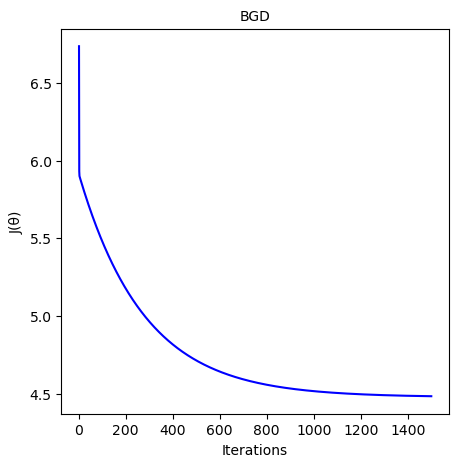


Final value of the Cost Function for BGD method:

J(θ) = [4.48338826]



In [18]:
iterations2 = np.arange(1, len(J_theta2) + 1)
plt.figure(figsize=(5, 5), )
plt.plot(iterations2, J_theta2, c='blue'), plt.title('BGD', fontsize=10), plt.xlabel('Iterations'), \
plt.ylabel('J(\u03B8)')
plt.show()
print(f'\nFinal value of the Cost Function for BGD method:\n\nJ(\u03B8) = {J_theta2[-1]}\n')

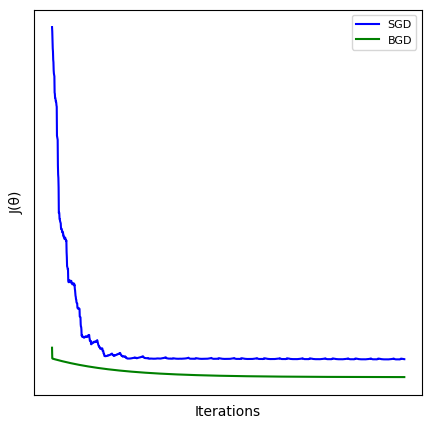

In [19]:
iterations1 = np.arange(1, len(J_theta1) + 1)
iterations2 = np.arange(1, len(J_theta2) + 1)

plt.figure(figsize=(5, 5))
plt.plot(iterations1[0: len(J_theta2)], J_theta1[0: len(J_theta2)], label='SGD', c='blue'), \
plt.xlabel('Iterations'), plt.ylabel('J(\u03B8)')
plt.plot(iterations2, J_theta2, label='BGD', c='g'), plt.xlabel('Iterations'), \
plt.ylabel('J(\u03B8)'), plt.xticks([]), plt.yticks([]), plt.legend(fontsize=8)
plt.show()

- - $\text{7. Which type of G.D. (online\batch) do you prefer here? Why?}$
$\newline$
$\newline$
- - - $\text{Answer:}$
$\newline$
$\newline$
$\text{BGD, because its convergence speed is higher (per iteration) and because we have all the data at the beginning, there is no need}$
$\newline$
$\text{to use the online method.}$

- [x] $\bf{\text{A}}$

- [ ] $\bf{\text{B. Multiple variable Regression:}}$

In [20]:
file_name_train = 'train.csv'
file_name_test = 'test.csv'

data_train = pd.read_csv(path + file_name_train)
data_test = pd.read_csv(path + file_name_test)

features_name_list = ['age', 'gender', 'bmi', 'children', 'smoker', 'region']
target_name_list = ['charges']
X_train_df = data_train[features_name_list]
y_train_df = data_train[target_name_list]
X_test_df = data_test[features_name_list]
y_test_df = data_test[target_name_list]

In [21]:
print('\n                 Training Data:')
data_train.head()


                 Training Data:


,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
print(f'Shape of the Train Data: {data_train.shape}')

Shape of the Train Data: (1000, 7)


In [23]:
print('\n                  Test Data:')
data_test.head()


                  Test Data:


,age,gender,bmi,children,smoker,region,charges
0,30,male,22.99,2,yes,northwest,17361.76610
1,24,male,32.70,0,yes,southwest,34472.84100
2,24,male,25.80,0,no,southwest,1972.95000
3,48,male,29.60,0,no,southwest,21232.18226
4,47,male,19.19,1,no,northeast,8627.54110


In [24]:
print(f'Shape of the Test Data: {data_test.shape}')

Shape of the Test Data: (150, 7)


- - $\text{Preprocessing for Train Data and Test Data:}$

In [25]:
def int_encoder(data_df: pd.DataFrame, series_name: str) -> np.ndarray:
    new_df = data_df.copy()
    x = np.array(new_df[series_name])
    values = np.unique(x)
    out = np.zeros(x.shape, dtype=int)
    values_dict = {}
    for i, value in enumerate(values):
        values_dict[value] = int(i + 1)
        out[x == value] = i + 1
    new_df[series_name] = out
    print(f'{series_name}: {values_dict}')
    return new_df

In [26]:
def one_hot_encoder(data_df: pd.DataFrame, series_name: str) -> pd.DataFrame:
    df1 = data_df.copy()
    series_shape = df1[series_name].shape
    features_list = list(df1.columns)
    features_list.remove(series_name)
    df2 = data_df.copy()
    df2 = df2[features_list]
    values_list = list(np.unique(df1[series_name]))
    values_dict = {}
    for value in values_list:
        new_name = series_name + '_' + value
        values_dict[new_name] = np.zeros(series_shape, dtype=int)
        
    for value in values_list:
        new_name = series_name + '_' + value
        for i in range(len(df1[series_name])):
            if df1[series_name][i] == value: values_dict[new_name][i] = 1
        
        df2[new_name] = values_dict[new_name]
    
    return df2

> ${\bf{\text{Note:}}} \text{ To encode sex and smoking variables, apply
integer encoding, and for region variable, apply one-hot encoding (OHE).} $

In [27]:
X_train_pre_df = int_encoder(X_train_df, 'gender')
X_train_pre_df = int_encoder(X_train_pre_df, 'smoker')
X_train_pre_df = one_hot_encoder(X_train_pre_df, 'region')
print('\n\n                                 Encoded Training Data')
X_train_pre_df

gender: {'female': 1, 'male': 2}
smoker: {'no': 1, 'yes': 2}


                                 Encoded Training Data


,age,gender,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,2,0,0,0,1
1,18,2,33.770,1,1,0,0,1,0
2,28,2,33.000,3,1,0,0,1,0
3,33,2,22.705,0,1,0,1,0,0
4,32,2,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
995,39,1,23.275,3,1,1,0,0,0
996,39,1,34.100,3,1,0,0,0,1
997,63,1,36.850,0,1,0,0,1,0
998,33,1,36.290,3,1,1,0,0,0


In [28]:
X_test_pre_df = int_encoder(X_test_df, 'gender')
X_test_pre_df = int_encoder(X_test_pre_df, 'smoker')
X_test_pre_df = one_hot_encoder(X_test_pre_df, 'region')
print('\n\n                                 Endcoded Test Data')
X_test_pre_df

gender: {'female': 1, 'male': 2}
smoker: {'no': 1, 'yes': 2}


                                 Endcoded Test Data


,age,gender,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,30,2,22.990,2,2,0,1,0,0
1,24,2,32.700,0,2,0,0,0,1
2,24,2,25.800,0,1,0,0,0,1
3,48,2,29.600,0,1,0,0,0,1
4,47,2,19.190,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
145,52,2,32.775,3,1,0,1,0,0
146,60,2,32.800,0,2,0,0,0,1
147,20,1,31.920,0,1,0,1,0,0
148,55,2,21.500,1,1,0,0,0,1


In [29]:
# Min_Max_Scaler:
def min_max_scaler(x: pd.DataFrame) -> pd.DataFrame:
    scalered_df = x.copy()
    features_list = list(x.columns)
    for feature in features_list:
        scalered_df[feature] = (scalered_df[feature] - scalered_df[feature].min())/(scalered_df[feature].max() - \
                                                                                        scalered_df[feature].min())

    return scalered_df

In [30]:
# Min_Max_Scaler for Train Data:
X_train_pre_df = min_max_scaler(X_train_pre_df)
print('\n\n                                 Normalized Training Data')
X_train_pre_df



                                 Normalized Training Data


,age,gender,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.0,0.346891,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,1.0,0.517432,0.2,0.0,0.0,0.0,1.0,0.0
2,0.217391,1.0,0.495061,0.6,0.0,0.0,0.0,1.0,0.0
3,0.326087,1.0,0.195962,0.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,1.0,0.375363,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
995,0.456522,0.0,0.212522,0.6,0.0,1.0,0.0,0.0,0.0
996,0.456522,0.0,0.527019,0.6,0.0,0.0,0.0,0.0,1.0
997,0.978261,0.0,0.606915,0.0,0.0,0.0,0.0,1.0,0.0
998,0.326087,0.0,0.590645,0.6,0.0,1.0,0.0,0.0,0.0


In [31]:
# Min_Max_Scaler for Test Data:
X_test_pre_df = min_max_scaler(X_test_pre_df)
print('\n\n                                  Normalized Test Data')
X_test_pre_df



                                  Normalized Test Data


,age,gender,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0.260870,1.0,0.161519,0.4,1.0,0.0,1.0,0.0,0.0
1,0.130435,1.0,0.436668,0.0,1.0,0.0,0.0,0.0,1.0
2,0.130435,1.0,0.241145,0.0,0.0,0.0,0.0,0.0,1.0
3,0.652174,1.0,0.348824,0.0,0.0,0.0,0.0,0.0,1.0
4,0.630435,1.0,0.053840,0.2,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
145,0.739130,1.0,0.438793,0.6,0.0,0.0,1.0,0.0,0.0
146,0.913043,1.0,0.439501,0.0,1.0,0.0,0.0,0.0,1.0
147,0.043478,0.0,0.414565,0.0,0.0,0.0,1.0,0.0,0.0
148,0.804348,1.0,0.119297,0.2,0.0,0.0,0.0,0.0,1.0


In [32]:
m_train = X_train_pre_df.shape[0]
X_train_new_df = pd.DataFrame({'x0': np.ones((m_train, )), 'age': X_train_pre_df['age'], \
                               'gender': X_train_pre_df['gender'], \
'bmi': X_train_pre_df['bmi'], 'children': X_train_pre_df['children'], \
'smoker': X_train_pre_df['smoker'], 'region_northeast': X_train_pre_df['region_northeast'], \
'region_northwest': X_train_pre_df['region_northwest'], 'region_southeast': X_train_pre_df['region_southeast'], \
'region_southwest': X_train_pre_df['region_southwest']})
print('\n\n                              Final Preprocessed Training Data')
X_train_new_df



                              Final Preprocessed Training Data


,x0,age,gender,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,1.0,0.021739,0.0,0.346891,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.000000,1.0,0.517432,0.2,0.0,0.0,0.0,1.0,0.0
2,1.0,0.217391,1.0,0.495061,0.6,0.0,0.0,0.0,1.0,0.0
3,1.0,0.326087,1.0,0.195962,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.304348,1.0,0.375363,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.456522,0.0,0.212522,0.6,0.0,1.0,0.0,0.0,0.0
996,1.0,0.456522,0.0,0.527019,0.6,0.0,0.0,0.0,0.0,1.0
997,1.0,0.978261,0.0,0.606915,0.0,0.0,0.0,0.0,1.0,0.0
998,1.0,0.326087,0.0,0.590645,0.6,0.0,1.0,0.0,0.0,0.0


In [33]:
m_test = X_test_pre_df.shape[0]
X_test_new_df = pd.DataFrame({'x0': np.ones((m_test, )), 'age': X_test_pre_df['age'], \
'gender': X_test_pre_df['gender'], 'bmi': X_test_pre_df['bmi'], 'children': X_test_pre_df['children'], \
'smoker': X_test_pre_df['smoker'], 'region_northeast': X_test_pre_df['region_northeast'], \
'region_northwest': X_test_pre_df['region_northwest'], 'region_southeast': X_test_pre_df['region_southeast'], \
'region_southwest': X_test_pre_df['region_southwest']})
print('\n\n                                  Final Preprocessed Test Data')
X_test_new_df



                                  Final Preprocessed Test Data


,x0,age,gender,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,1.0,0.260870,1.0,0.161519,0.4,1.0,0.0,1.0,0.0,0.0
1,1.0,0.130435,1.0,0.436668,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.130435,1.0,0.241145,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.652174,1.0,0.348824,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.630435,1.0,0.053840,0.2,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
145,1.0,0.739130,1.0,0.438793,0.6,0.0,0.0,1.0,0.0,0.0
146,1.0,0.913043,1.0,0.439501,0.0,1.0,0.0,0.0,0.0,1.0
147,1.0,0.043478,0.0,0.414565,0.0,0.0,0.0,1.0,0.0,0.0
148,1.0,0.804348,1.0,0.119297,0.2,0.0,0.0,0.0,0.0,1.0


In [250]:
#      X_test_new_df             ---------          X_train_new_df
# ------------------------>>    |  Model |    <<--------------------------
#       (For_Prob)              ---------            (Back_Prob)

- - ${\bf{Q:}}\text{ Why is OHE better at encoding regional features compared to integer encoding?}$
$\newline$
$\newline$
- - - $\text{Answer:}$
$\newline$
$\text{Because there is no ordering relationship between regional features.}$

> > ${\bf{\text{Note:}}}{\text{ set the basis function for feature bmi to }} {x^{2}.} \text{ ( use }{bmi^{2}}\text{ instead of bmi feature ).}$

- - $\text{1. Calculate w by closed-form solution calculated by MSE method.}$
$\newline$
$\newline$
- - - $\text{Answer:}$
$\newline$
$\newline$
$${\bf{w^{*}}} = ({\bf{X}}^{T}{\bf{X}})^{-1} {\bf{X}}^{T}{\bf{y}}$$
$\newline$
$\newline$
$\text{By implementing in Python: }$
$\newline$
$\newline$
$${\bf{{w}^{*}}}{\,}{=}{\;\;} {\begin{pmatrix}1.115780 \\  0.196793 \\ -0.004687 \\
0.201581 \\ 0.031830 \\ 0.370975 \\ -0.482970 \\ -0.566448 \\
 -0.496574 \\ -0.426065\end{pmatrix}}$$
$\newline$
$\newline$

In [34]:
X_train_ndarray = np.array(X_train_new_df)

y_train_normal_df = min_max_scaler(y_train_df)
y_train_ndarray = np.array(y_train_normal_df)

y_test_normal_df = min_max_scaler(y_test_df)
y_test_ndarray = np.array(y_test_normal_df)

In [35]:
X_train_new_sett_ndarray = X_train_ndarray.copy()
X_train_new_sett_ndarray[:, 3] = X_train_ndarray[:, 3]**2
y_train_new_sett_ndarray = y_train_ndarray

X_test_new_sett_ndarray = np.array(X_test_new_df)
X_test_new_sett_ndarray[:, 3] = X_test_new_sett_ndarray[:, 3]**2
y_test_new_sett_ndarray = y_test_ndarray

In [36]:
w_opt = np.linalg.inv(X_train_new_sett_ndarray.T @ X_train_new_sett_ndarray) @ \
X_train_new_sett_ndarray.T @ y_train_new_sett_ndarray
pd.DataFrame({'W': w_opt.ravel()}, index=['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9'])

,W
w0,1.115780
w1,0.196793
w2,-0.004687
w3,0.201581
w4,0.031830
w5,0.370975
w6,-0.482970
w7,-0.566448
w8,-0.496574
w9,-0.426065


In [37]:
X_train = X_train_new_sett_ndarray.copy()
y_train = y_train_new_sett_ndarray.copy()
m_train = X_train.shape[0]

X_test = X_test_new_sett_ndarray.copy()
y_test = y_test_new_sett_ndarray.copy()
m_test = X_test.shape[0]

w_opt = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
J_train = (1/(2*m_train))*np.linalg.norm(X_train @ w_opt - y_train)**2
J_test = (1/(2*m_test))*np.linalg.norm(X_test @ w_opt - y_test)**2

In [40]:
print(f'\nJ(\u03B8) for train:\n\n{J_train}')
print(f'\n\n\nJ(\u03B8) for test:\n\n{J_test}')


J(θ) for train:

0.21493123965683714



J(θ) for test:

0.17653574740460437


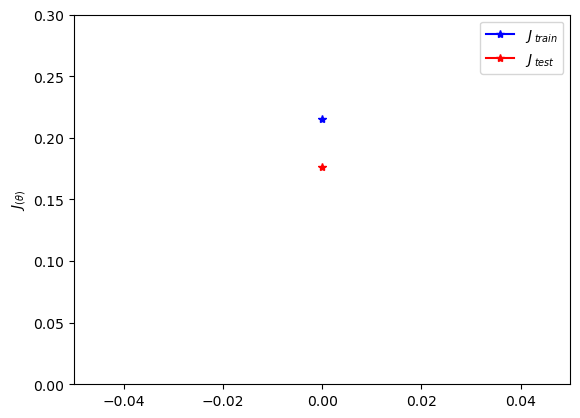

In [38]:
plt.figure()
plt.plot(J_train, marker='*', c='blue', label='$J_{\; train}$')
plt.plot(J_test, marker='*', c='red', label='$J_{\; test}$'), plt.ylabel('$J_{(\\theta)}$')
plt.xlim([-0.05, 0.05]), plt.ylim([0, 0.3])
plt.legend()
plt.show()

In [39]:
print('\n\n                       X_Train[:10, :4] \n\n\n')
X_train_new_sett_ndarray[:10, :4]



                       X_Train[:10, :4] 





array([[1.        , 0.02173913, 0.        , 0.1203336 ],
       [1.        , 0.        , 1.        , 0.26773559],
       [1.        , 0.2173913 , 1.        , 0.2450854 ],
       [1.        , 0.32608696, 1.        , 0.03840097],
       [1.        , 0.30434783, 1.        , 0.1408975 ],
       [1.        , 0.2826087 , 0.        , 0.08073391],
       [1.        , 0.60869565, 0.        , 0.25790581],
       [1.        , 0.41304348, 0.        , 0.11713019],
       [1.        , 0.41304348, 1.        , 0.1623795 ],
       [1.        , 0.91304348, 0.        , 0.08239335]])

In [40]:
print('\n\n                        X_Test[:10, :4] \n\n\n')
X_test_new_sett_ndarray[:10, :4]



                        X_Test[:10, :4] 





array([[1.        , 0.26086957, 1.        , 0.02608834],
       [1.        , 0.13043478, 1.        , 0.1906786 ],
       [1.        , 0.13043478, 1.        , 0.05815081],
       [1.        , 0.65217391, 1.        , 0.1216782 ],
       [1.        , 0.63043478, 1.        , 0.0028987 ],
       [1.        , 0.23913043, 1.        , 0.16742915],
       [1.        , 0.2173913 , 1.        , 0.11504957],
       [1.        , 0.63043478, 1.        , 0.0958384 ],
       [1.        , 0.15217391, 1.        , 0.04754599],
       [1.        , 0.7173913 , 1.        , 0.0876858 ]])

- - $\text{2. At first, assume that the total training data is 10, then gradually increase the training
data (with step size equals to 10) }
\newline
\text{until reach out to 1000. In each step, report the test error
(MSE) in a diagram.}$

In [44]:
X_test = X_test_new_sett_ndarray
y_test = y_test_new_sett_ndarray
m_test = X_test.shape[0]
eps = 1e-9
n = X_train_new_sett_ndarray.shape[1]
I_n = np.ones((n, n))
J_test1_list = []

for i in range(1, 101):
    try:
        X_train = X_train_new_sett_ndarray[: 10*i]
        y_train = y_train_new_sett_ndarray[: 10*i]
        
        w_trained = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
        
        J_closed_form = np.linalg.norm(X_test @ w_trained - y_test)
        J_closed_form = (J_closed_form**2) / (2*m_test)
        J_test1_list.append(J_closed_form)
    except: 
        w_trained = np.linalg.inv((X_train.T @ X_train) + eps*I_n) @ X_train.T @ y_train
        J_closed_form = np.linalg.norm(X_test @ w_trained - y_test, ord=2)
        J_closed_form = (J_closed_form**2) / (2*m_test)
        J_test1_list.append(J_closed_form)

J_test1_ndarray = np.array(J_test1_list)

In [45]:
J_test1_ndarray.shape

(100,)

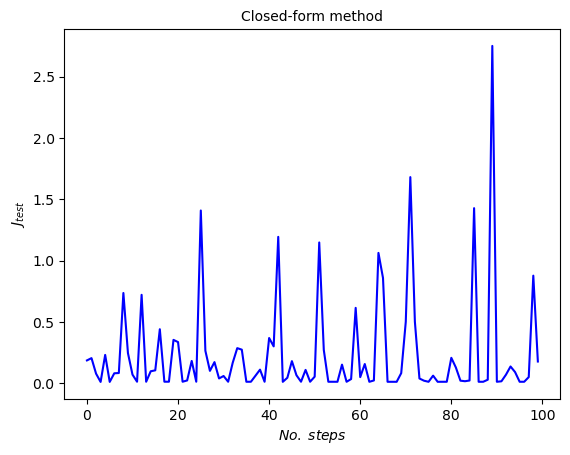

In [46]:
J1_closed_form = J_test1_ndarray
levels = np.arange(len(J1_closed_form))
plt.plot(levels, J1_closed_form, c='blue'), plt.title('Closed-form method', fontsize=10), \
plt.ylabel('$J_{test}$'), \
plt.xlabel('$No.\; steps$')
plt.show()

In [333]:
print(f'\nFinal J(\u03B8) (test error) for Closed-form method is: \n\n{J1_closed_form[-1]}')


Final J(θ) (test error) for Closed-form method is: 

0.17653574740460434


- - $\text{3. Implement batch gradient descent and stochastic gradient descent to solve this
problem. Report the train and test error in each case.}$

In [158]:
def SGD2(x: np.ndarray, y: np.ndarray, iteration: int=1500, learning_rate: float=0.01) -> (np.ndarray, float):
    m, n = x.shape
    theta_init = np.zeros(shape=(n, 1))
    theta = theta_init
    for it in range (iteration):
        d_theta = np.zeros(shape=(n, 1))
        for i in range(m):
            for j in range(n):
                d_theta[j][0] = (x[i] @ theta - y[i]) * x[i][j]
            d_theta /= m
            theta_new = theta - (learning_rate*d_theta)
            theta = theta_new
            
    J_theta = (1/(2*m)) * ((x @ theta - y).T @ (x @ theta - y))
    return (theta, J_theta)

In [160]:
X_test = X_test_new_sett_ndarray
y_test = y_test_new_sett_ndarray
m_test = X_test.shape[0]
J_test2 = []
for i in range(1, 101):

    X_train = X_train_new_sett_ndarray[: 10*i]
    y_train = y_train_new_sett_ndarray[: 10*i]
    w_trained, _ = SGD2(X_train, y_train)
    J = np.linalg.norm((X_test @ w_trained - y_test))**2
    J_test2.append(J)
        

J_test2_ndarray = np.array(J_test2)

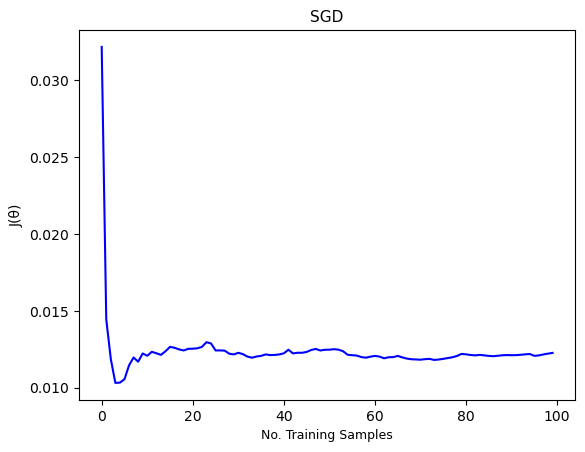

In [161]:
J2 = J_test2_ndarray/(2*m_test)

levels = range(len(J2))
plt.plot(levels, J2, c='blue'), plt.title('SGD', fontsize=11)
plt.xlabel('No. Training Samples', fontsize=9), plt.ylabel('J(\u03B8)')
plt.show()

In [162]:
def BGD2(x: np.ndarray, y: np.ndarray, iteration: int=1500, learning_rate: float=0.01) -> (np.ndarray, float):
    
    m, n = x.shape
    theta_init = np.zeros(shape=(n, 1))
    theta = theta_init
    for it in range(iteration):
        
        
        d_theta = np.zeros(shape=(n, 1))
        for j in range(n):
            
            for i in range(m):
                d_theta[j][0] += (x[i] @ theta - y[i]) * x[i][j]
            d_theta[j][0] /= m
            
        theta_new = theta - (learning_rate*d_theta)
        theta = theta_new
    
    J_theta = (1/(2*m)) * ((x @ theta - y).T @ (x @ theta - y))        
    return (theta, J_theta)

In [163]:
X_test = X_test_new_sett_ndarray
y_test = y_test_new_sett_ndarray
m_test = X_test.shape[0]
J_test3 = []
for i in range(1, 101):

    X_train = X_train_new_sett_ndarray[: 10*i]
    y_train = y_train_new_sett_ndarray[: 10*i]
    w_trained, _ = BGD2(X_train, y_train)
    J = np.linalg.norm((X_test @ w_trained - y_test))**2
    J_test3.append(J)
        

J_test3_ndarray = np.array(J_test3)

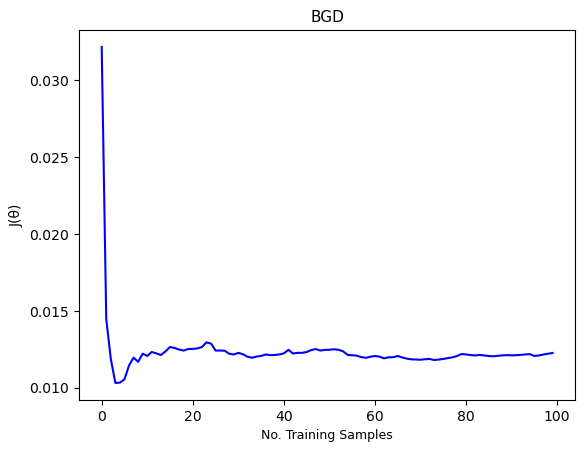

In [164]:
J3 = J_test3_ndarray/(2*m_test)

levels = range(len(J3))
plt.plot(levels, J3, c='blue'), plt.title('BGD', fontsize=11)
plt.xlabel('No. Training Samples', fontsize=9), plt.ylabel('J(\u03B8)')
plt.show()

- - $\text{4. Now, add a L2 regulator to the cost function and solve the problem using closed-form.
Specify the best value for regularizer}$
$\newline$
$\text{parameter } (\lambda) \text{ between } 10^{-4} , 10^{-3} , ..., 1, ..., 10^{3}, 10^{4}.
\text{ Plot both train and test errors concerning the logarithmic amount of} \lambda.$

- - - $\text{Answer:}$
$\newline$
$\newline$
$\text{For }{\bf{MSE}} \text{ aproach we have:}$
$\newline$
$\newline$
$$J_{level}({\bf{w}}) = \frac{1}{2m_{level}} \; \{ \; \lVert {\bf{X}}_{level} {\bf{w}} - 
{\bf{y}}_{level} \rVert_{2}^{2} + \lambda \lVert {\bf{w}} \rVert_{2}^{2} \; \} \; \; \; \; \; \; \; \text{that} \; \; \; \; \; \; \; level = \begin{cases} \text{train} \\ \text{test}\end{cases}$$
$\newline$
$\newline$
$$ \Longrightarrow \; \; \; \; \; \; \; \; \; \underbrace{ \; \; {\bf{w^{*}}} = (\; {\bf{X}}^{T}{\bf{X}} + \lambda {\bf{I_{n}}}\;)^{-1} \; {\bf{X}}^{T}{\bf{y}}\; \; }_{\; \; \; \bf{\text{Redge Regression}}}$$
$\newline$
$\newline$

In [41]:
lambda_ndarray = np.logspace(start=-4, stop=4, num=9)
# lambda_ndarray = [0]
print(f'\u03BB values: {lambda_ndarray}')

X_train = X_train_new_sett_ndarray.copy()
y_train = y_train_new_sett_ndarray.copy()
X_test = X_test_new_sett_ndarray.copy()
y_test = y_test_new_sett_ndarray.copy()
m_train, n = X_train.shape
m_test = X_test.shape[0]
I_n = np.identity(n)

J_test_list = []
J_train_list = []
for lambda_value in lambda_ndarray:
    w_star = np.linalg.inv(X_train.T @ X_train + (lambda_value * I_n)) @ X_train.T @ y_train
    J_train_float = (np.linalg.norm(X_train @ w_star - y_train)**2) + (lambda_value*(np.linalg.norm(w_star)**2))
    J_test_float = (np.linalg.norm(X_test @ w_star - y_test)**2) + (lambda_value*(np.linalg.norm(w_star)**2))
    J_train_list.append(J_train_float)
    J_test_list.append(J_test_float)
    
    
J_train_ndarray = np.array(J_train_list)
J_train_ndarray /= (2*m_train)

J_test_ndarray = np.array(J_test_list)
J_test_ndarray /= (2*m_test)

print(f'\n\n\n J(\u03B8) values for train: \n\n{J_train_ndarray}')
print(f'\n\n\nJ(\u03B8) values for test: \n\n{J_test_ndarray}')

λ values: [1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]



 J(θ) values for train: 

[0.0045274  0.00452749 0.00452847 0.00453825 0.00463485 0.00550644
 0.01049786 0.02169809 0.03305775]



J(θ) values for test: 

[0.01151603 0.01151672 0.01152354 0.01159162 0.01225848 0.01787743
 0.04131668 0.07203825 0.0749632 ]


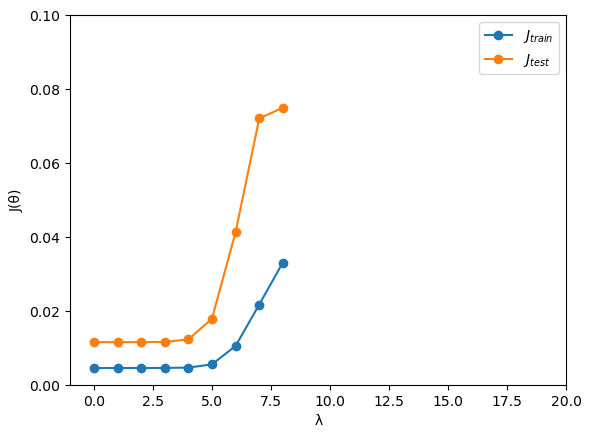

In [42]:
plt.figure()
plt.plot(J_train_ndarray, marker='o', label='$J_{train}$')
plt.plot(J_test_ndarray, marker='o', label='$J_{test}$')
plt.xlabel('\u03BB'), plt.ylabel('J(\u03B8)'), plt.axis([-1, 20, 0, 0.1])
plt.legend()
plt.show()

- - - $\text{Answer:}$
$\newline$
$\newline$
$\lambda^{*} = 10^{-4}$
$\newline$

- - $\text{5. Compare the results with and without regularization.}$

In [54]:
results_dict = {'\u03BB': [0, 1e-4], 'Train Error': [0.215, 0.0045], 'Test Error': [0.176, 0.012]}
results_df = pd.DataFrame(results_dict, )
results_df

,λ,Train Error,Test Error
0,0.0000,0.2150,0.176
1,0.0001,0.0045,0.012


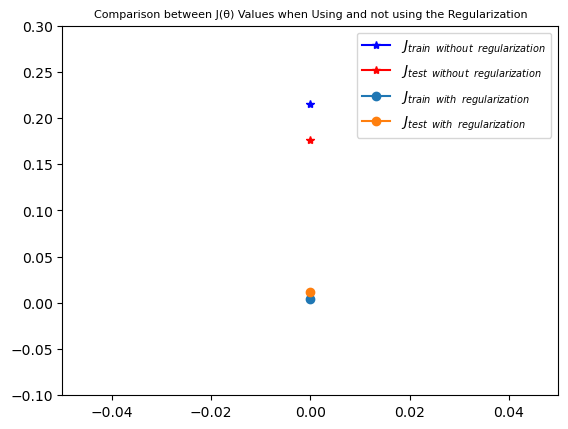

In [52]:
J_train_without_reg = [0.21493123965683714]
J_test_without_reg = [0.17653574740460437]
J_train_with_reg = [0.0045274]
J_test_with_reg = [0.011510603]

plt.figure()
plt.plot(J_train_without_reg, label='$J_{train\;\;without\;\;regularization}$', marker='*', c='blue')
plt.plot(J_test_without_reg, label='$J_{test\;\;without\;\;regularization}$', marker='*', c='red')
plt.plot(J_train_with_reg, label='$J_{train\;\;with\;\;regularization}$', marker='o')
plt.plot(J_test_with_reg, label='$J_{test\;\;with\;\;regularization}$', marker='o')
plt.xlim([-0.05, 0.05]), plt.ylim([-0.1, 0.3]), plt.title("Comparison between J(\u03B8) \
Values when Using and not using the Regularization", fontsize=8)
plt.legend()
plt.show()

- - - $\text{Answer:}$
$\newline$
$\newline$
$\text{By using the best value for the Regularization parameter} {\;(\lambda^{*})} \text{, both the testing and training errors are reduced, moreover, } 
\newline\text{they are closer to each other, which shows the ability to further generalize the model.}$

- [x] $\bf{\text{B}}$